# 一.读取数据

In [2]:
import pandas as pd 
data = pd.read_csv('dataset.csv',encoding='ISO-8859-1') 
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014/12/31,2015/1/5,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,OFF-FA-10000263,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium
51097,51095,TU-2014-5170,2014/12/31,2015/1/4,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,FUR-TEN-10000558,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium
51098,51096,MO-2014-2560,2014/12/31,2015/1/5,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium
51099,51097,ES-2014-4785777,2014/12/31,2015/1/4,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,OFF-BI-10000620,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium


# 二.数据清洗

In [ ]:
#1.确定数据范围
#找到业务数据符合业务规则 

# 2.清洗数据

In [6]:
#1根据业务需要提取数据,发货日期早于下单日期 
#1)转换时间类型
data['ShipDate'] = pd.to_datetime(data['ShipDate'])
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
#2)计算时间差  
data['interval'] = (data['ShipDate']-data['OrderDate']).dt.total_seconds()
data
#3)找时间差 
data.drop(index=data[data.interval<0].index,inplace=True) 
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,604800.0
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,604800.0
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,604800.0
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,345600.0
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,345600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,432000.0
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,345600.0
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,432000.0
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,345600.0


In [7]:
#2售价为负 
data[data.Sales<0]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval


In [8]:
#3.查看数据 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51097 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          51097 non-null  int64         
 1   OrderID        51097 non-null  object        
 2   OrderDate      51097 non-null  datetime64[ns]
 3   ShipDate       51097 non-null  datetime64[ns]
 4   ShipMode       51086 non-null  object        
 5   CustomerID     51097 non-null  object        
 6   CustomerName   51097 non-null  object        
 7   Segment        51097 non-null  object        
 8   City           51097 non-null  object        
 9   State          51097 non-null  object        
 10  Country        51097 non-null  object        
 11  PostalCode     9962 non-null   float64       
 12  Market         51097 non-null  object        
 13  Region         51097 non-null  object        
 14  ProductID      51097 non-null  object        
 15  Category       5109

In [11]:
#4.数据清洗 
#脏数据  空值\异常值\重复值 
#手段    弥补(字符串:众数;数字类型:平均值 ) , 删除(drop(col=[]))  
#1.重复值 
#unique() 不重复 
data.RowID.unique().size
data[data.RowID.duplicated()]
data.drop(index=data[data.RowID.duplicated()].index,inplace=True)
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,604800.0
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,604800.0
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,604800.0
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,345600.0
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,345600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,432000.0
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,345600.0
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,432000.0
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,345600.0


In [15]:
#5.清洗ShipMode 
#空值, 数字类型 , 字符串(众数)
data[data.ShipMode.isnull()]
data.ShipMode.mode() #查看众数 
data['ShipMode'].fillna(value=data.ShipMode.mode()[0],inplace=True)
data
data[data.ShipMode.isnull()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval


In [22]:
#6.折扣 
data[data.Discount>1] #异常数据  
data[data.Discount<0]
#异常数据, 数字类型 
#异常数据--->空值--->弥补 
data['Discount'] = data['Discount'].mask(data['Discount']>1, None)
data[data.Discount.isnull()]
#平均值 
#df.Discount.平均  所有的值平均 
#meanDiscount 把非空的平均 
meanDiscount = round(data[data.Discount.notnull()].Discount.sum()/data[data.Discount.notnull()].Discount.size,2)
data['Discount'].fillna(value=meanDiscount, inplace=True)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          51094 non-null  int64         
 1   OrderID        51094 non-null  object        
 2   OrderDate      51094 non-null  datetime64[ns]
 3   ShipDate       51094 non-null  datetime64[ns]
 4   ShipMode       51094 non-null  object        
 5   CustomerID     51094 non-null  object        
 6   CustomerName   51094 non-null  object        
 7   Segment        51094 non-null  object        
 8   City           51094 non-null  object        
 9   State          51094 non-null  object        
 10  Country        51094 non-null  object        
 11  PostalCode     9962 non-null   float64       
 12  Market         51094 non-null  object        
 13  Region         51094 non-null  object        
 14  ProductID      51094 non-null  object        
 15  Category       5109

In [23]:
#7.删除postalCode 
data.drop(columns=['PostalCode'],inplace=True)
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,604800.0
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,604800.0
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,604800.0
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,345600.0
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,345600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,432000.0
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,345600.0
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,432000.0
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,345600.0


In [26]:
#8.数据整理 
data['Order-year'] = data['OrderDate'].dt.year 
data['Order-month'] = data['OrderDate'].dt.month
data['quarter'] = data['OrderDate'].dt.to_period('Q')
data
#清洗: 数据分析使用到相应的数据,评估 (数字类型字段)   数据重要性
#整理: 分析维度 , 整理

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval,Order-year,Order-month,quarter
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.036,9.72,Medium,604800.0,2011,1,2011Q1
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,55.242,2,0.1,15.342,1.80,Medium,604800.0,2011,1,2011Q1
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,113.670,5,0.1,37.770,4.70,Medium,604800.0,2011,1,2011Q1
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,44.865,3,0.5,-26.055,4.82,High,345600.0,2011,1,2011Q1
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.640,8.17,High,345600.0,2011,1,2011Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,39.420,3,0.0,17.280,2.97,Medium,432000.0,2014,12,2014Q4
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,173.760,4,0.6,-117.360,13.72,Medium,345600.0,2014,12,2014Q4
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,3.990,1,0.0,0.420,0.49,Medium,432000.0,2014,12,2014Q4
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,32.250,5,0.0,8.250,2.21,Medium,345600.0,2014,12,2014Q4


# 三.数据分析

# 1. 每年销售额的增长情况 

In [32]:
#每一年销售额  增长(量,率)
#1.每年销售额 
sales_year = data.groupby(by='Order-year')['Sales'].sum() 
sales_year

#2.每一年销售增长率 小数
#(12年销售额-11年销售额)/11年销售额 
sales_rate_12 = sales_year[2012]/sales_year[2011]-1 
sales_rate_13 = sales_year[2013]/sales_year[2012]-1 
sales_rate_14 = sales_year[2014]/sales_year[2013]-1 
print(sales_rate_12,sales_rate_13,sales_rate_14)

#3.每一年销售增长率 百分比 
sales_rate_12_label = "%.2f%%" %(sales_rate_12*100)
sales_rate_13_label = "%.2f%%" %(sales_rate_13*100)
sales_rate_14_label = "%.2f%%" %(sales_rate_14*100)
print(sales_rate_12_label,sales_rate_13_label,sales_rate_14_label)

#4.放在数组中
sales_rate = pd.DataFrame(
    {
        'sales_all':sales_year,
        'sales_rate':[0,sales_rate_12,sales_rate_13,sales_rate_14],
        'sales_rate_label' :[0, sales_rate_12_label,sales_rate_13_label,sales_rate_14_label]
    }
)
print(sales_rate)

0.18232782910632062 0.2730243556885772 0.2630055018020905
18.23% 27.30% 26.30%
               sales_all  sales_rate sales_rate_label
Order-year                                           
2011        2.254364e+06    0.000000                0
2012        2.665397e+06    0.182328           18.23%
2013        3.393116e+06    0.273024           27.30%
2014        4.285524e+06    0.263006           26.30%


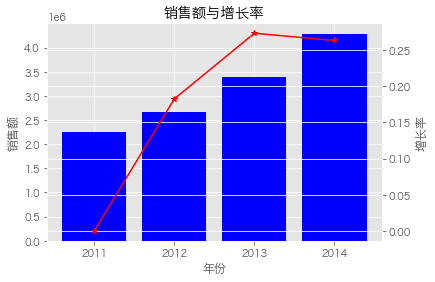

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# 设置字体
mpl.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
# 设置风格 
plt.style.use('ggplot')
#纵轴坐标 
y1 = sales_rate['sales_all']#销售额
y2 = sales_rate['sales_rate'] #销售增长率 
x = [str(value) for value in sales_rate.index.tolist()] #年份 
# 新建figure对象
fig=plt.figure() 
# 新建子图1
ax1=fig.add_subplot(1,1,1)
# ax2与ax1共享X轴
ax2 = ax1.twinx()
ax1.bar(x,y1,color = 'blue')
ax2.plot(x,y2,marker='*',color = 'r')
ax1.set_xlabel('年份')
ax1.set_ylabel('销售额')
ax2.set_ylabel('增长率')
ax1.set_title('销售额与增长率')
plt.show()

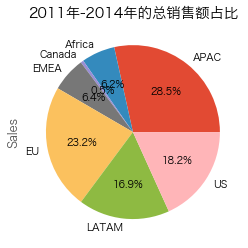

In [36]:
#2. 各个地区分店的销售额 
sales_area = data.groupby(by='Market')['Sales'].sum()
sales_area.plot(kind='pie',autopct="%1.1f%%",title='2011年-2014年的总销售额占比')

Market  Order-year
APAC    2011          6.392860e+05
        2012          7.626700e+05
        2013          9.748620e+05
        2014          1.209074e+06
Africa  2011          1.271572e+05
        2012          1.445311e+05
        2013          2.290522e+05
        2014          2.830364e+05
Canada  2011          8.509110e+03
        2012          1.609680e+04
        2013          1.916115e+04
        2014          2.316111e+04
EMEA    2011          1.364123e+05
        2012          1.633236e+05
        2013          2.046407e+05
        2014          3.015676e+05
EU      2011          4.774843e+05
        2012          6.519848e+05
        2013          7.561806e+05
        2014          1.039217e+06
LATAM   2011          3.814390e+05
        2012          4.563956e+05
        2013          6.009647e+05
        2014          6.957994e+05
US      2011          4.840761e+05
        2012          4.703954e+05
        2013          6.082544e+05
        2014          7.336683e+05
N

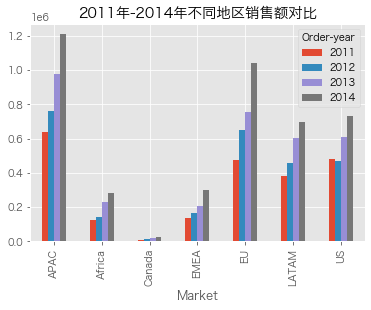

In [42]:
##各地区每一年的销售额
# 地区, 年份 
sales_area = data.groupby(by=['Market','Order-year'])['Sales'].sum()
print(sales_area)
# 将分组后的多层索引设置成列数据
sales_area = sales_area.reset_index(level=[0,1])
print(sales_area)
#透视表 
sales_area = pd.pivot_table(sales_area, index='Market',columns='Order-year',values ='Sales')
sales_area
sales_area.plot(kind = 'bar',title = '2011年-2014年不同地区销售额对比')

Order-year           2011          2012          2013          2014
Order-month                                                        
1             96240.09466  135459.72024  198504.18738  239664.43566
2             91044.31298  100604.59698  167088.63040  184437.06256
3            145523.43736  163033.35516  198443.11012  263092.18062
4            116915.76418  160878.65952  177500.07684  242683.90130
5            146738.47410  207535.69548  260498.56470  287528.27014
6            214960.36022  255527.56242  392539.29090  400966.04020
7            115510.41912  145175.22112  229394.15200  258705.68048
8            207544.59122  300699.44238  326488.78936  455480.73236
9            290214.45534  287348.82908  371986.23568  480815.97570
10           198682.94404  252707.43020  292197.06112  421571.18916
11           298496.53752  319218.25906  373399.26010  552105.36500
12           332492.61104  337208.52460  405076.31710  498472.93348


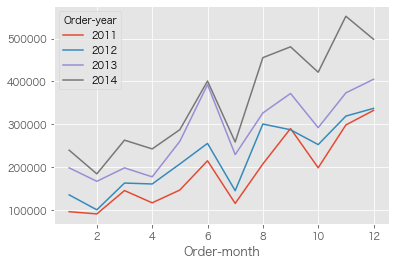

In [43]:
#3.销售淡旺季 
#4组, 
year_month = data.groupby(by=['Order-year','Order-month'])['Sales'].sum()
  
# 将索引订单年转为一列数据
sales_year_month = year_month.reset_index(level=[0,1])
# 利用透视表的确定销售额预览表
sales_year_month = pd.pivot_table(sales_year_month,
                                  index='Order-month',
                                  columns='Order-year',
                                  values='Sales')
print(sales_year_month)
# 绘制图形
sales_year_month.plot()

In [54]:
#4. 新增客户 
#1)复制整个数据 
data_customer = data.copy()  
data_customer 
#每一月份, 新增客户数是多少 
#年,月份, CustomerID用户唯一标识, 
#思路:按照CustomerID 不重复为基准, 在该月产生的订单,意味该用户在该月份是新用户 
#2)按照CustomerID 不重复
data_customer = data_customer.drop_duplicates(subset=['CustomerID']) 
data_customer
#3)按照年份,月份进行分组
new_customer = data_customer.groupby(by=['Order-year','Order-month']).size()  
print(new_customer)
#4)重置索引 
new_customer = new_customer.reset_index(level=[0,1])
print(new_customer)
#5)形成透视表 
customer_year_month = pd.pivot_table(new_customer,
                                     index='Order-month' ,
                                     columns ='Order-year' ,
                                     values=0,
                                     fill_value=0)
customer_year_month

Order-year  Order-month
2011        1              197
            2              139
            3              173
            4              143
            5              114
            6              151
            7               64
            8              106
            9               85
            10              49
            11              47
            12              41
2012        1               25
            2               14
            3               18
            4               16
            5               11
            6               28
            7                9
            8               28
            9               22
            10               6
            11              24
            12               9
2013        1                5
            2                6
            3                8
            4                5
            5                4
            6                6
            7                4
            8  

Order-year,2011,2012,2013,2014
Order-month,,,,
1,197,25,5,3
2,139,14,6,3
3,173,18,8,0
4,143,16,5,1
5,114,11,4,0
6,151,28,6,6
7,64,9,4,2
8,106,28,7,0
9,85,22,4,0


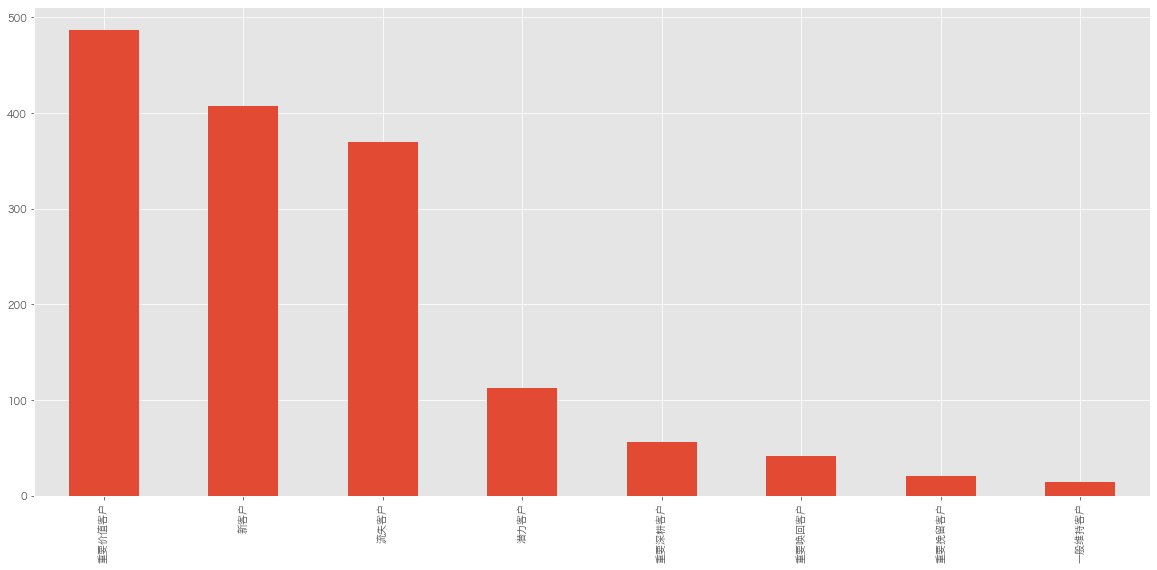

In [69]:
#RFM模型 
#1)只研究14年数据 
data_14 = data[data['Order-year']==2014]
#2)拿走相应字段 
data_14 = data_14[['CustomerID','OrderDate','Sales']] 
data_14

#3)改变整个数据 
customerdf = data_14.copy() 
customerdf.set_index('CustomerID',drop=True,inplace=True) #必须, 用户问题,用户作为索引 
customerdf
#4)添加频率 
customerdf['orders'] =1 
customerdf

#5)做透视 
# pd.pivot_table(数据,)
# 数据.pivot_table()
rfmdf = customerdf.pivot_table(index=['CustomerID'],
                              values=['OrderDate','orders','Sales'],
                              aggfunc={
                                  'OrderDate':'max',
                                  'orders':'sum',
                                  'Sales':'sum'
                              }
                              ) 
#6)计算R 
rfmdf['R'] = (rfmdf.OrderDate.max()-rfmdf.OrderDate).dt.days 
rfmdf
#7) F M 
rfmdf.rename(columns={'Sales':'M','orders':'F'},inplace=True)
rfmdf

#8)比较, 拿均值进行计算 
def rfm_func(x):
    # if x>=0 :#         "1"#       else: #         '0'
    level = x.apply(lambda x: "1" if x >= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '011':'重要价值客户',
        '111':'重要唤回客户',
        '001':'重要深耕客户',
        '101':'重要挽留客户',
        '010':'潜力客户',
        '110':'一般维持客户',
        '000':'新客户',
        '100':'流失客户'
    }
    result = d[label]
    return result

#9)操作rfm 
rfmdf['label'] = rfmdf[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) 
rfmdf
#10)每一类用户个数
rfmdf.groupby('label').count()

rfmdf.label.value_counts().plot.bar(figsize=(20,9))